In [9]:
# https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/ - to import csv file
# blog as reference - https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

from google.colab import files
uploaded = files.upload()


Saving Tesla.csv to Tesla.csv


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import statsmodels.api as smapi
import io
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv(io.BytesIO(uploaded['Tesla.csv']))
# print(df)
df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300
1,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100
2,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
3,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18793000
4,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700
...,...,...,...,...,...,...,...
95,2022-01-19,1041.709961,1054.670044,995.000000,995.650024,995.650024,25147500
96,2022-01-20,1009.729980,1041.660034,994.000000,996.270020,996.270020,23496200
97,2022-01-21,996.340027,1004.549988,940.500000,943.900024,943.900024,34126500
98,2022-01-24,904.760010,933.510010,851.469971,930.000000,930.000000,50791700


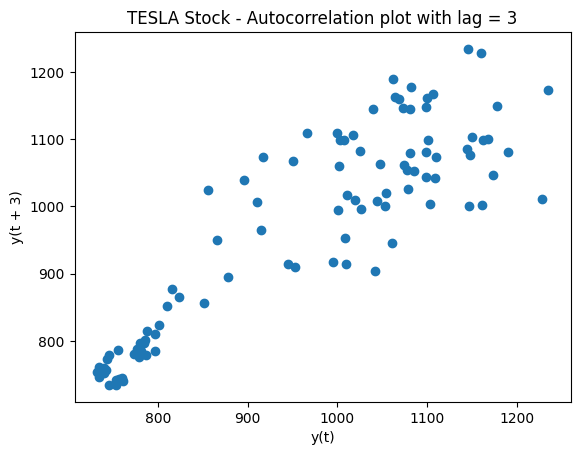

In [12]:
#code to check auto correlation
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()
#(There is auto-correlation in the data).
#We can now confirm that ARIMA is going to be a good model to be applied to this type of data

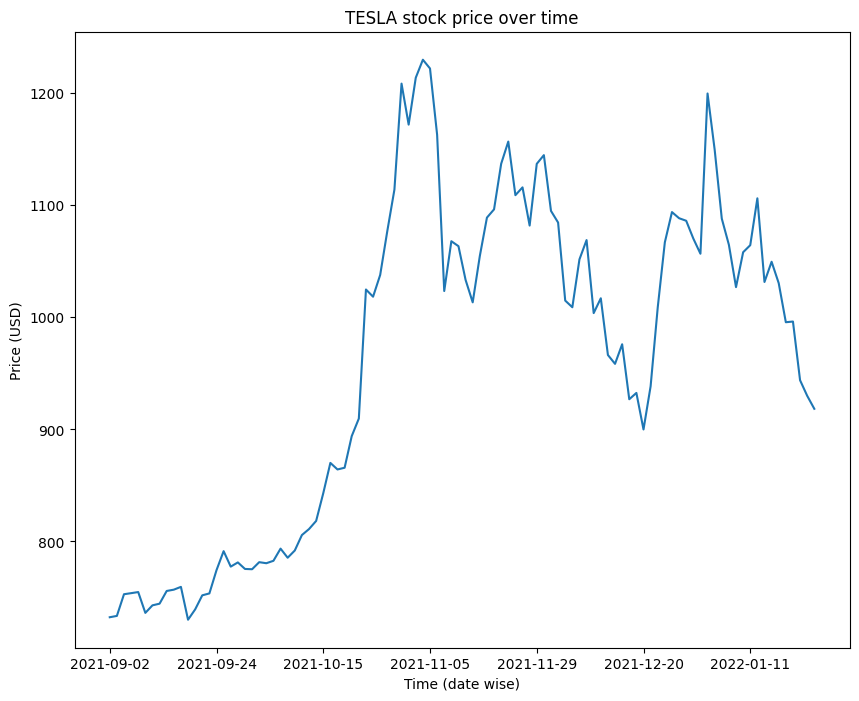

In [13]:
plt.figure(figsize = (10,8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,100, 15), df['Date'][0:100:15])
plt.title("TESLA stock price over time")
plt.xlabel("Time (date wise)")
plt.ylabel("Price (USD)")

plt.show()


In [16]:
# For this we select the following ARIMA parameters: p=4, d=1 and q=0.
# training (50 % ) and test (50%) set.
data_train, data_test = df[0:int(len(df)*0.5)], df[int(len(df)*0.5):]
training_data = data_train['Close'].values
data_test = data_test['Close'].values
history = [x for x in training_data]
model_predictions = []
N_observations_test = len(data_test)
for time_point in range(N_observations_test):
    model = smapi.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = data_test[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(data_test, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))




Testing Mean Squared Error is 1862.1752464015192


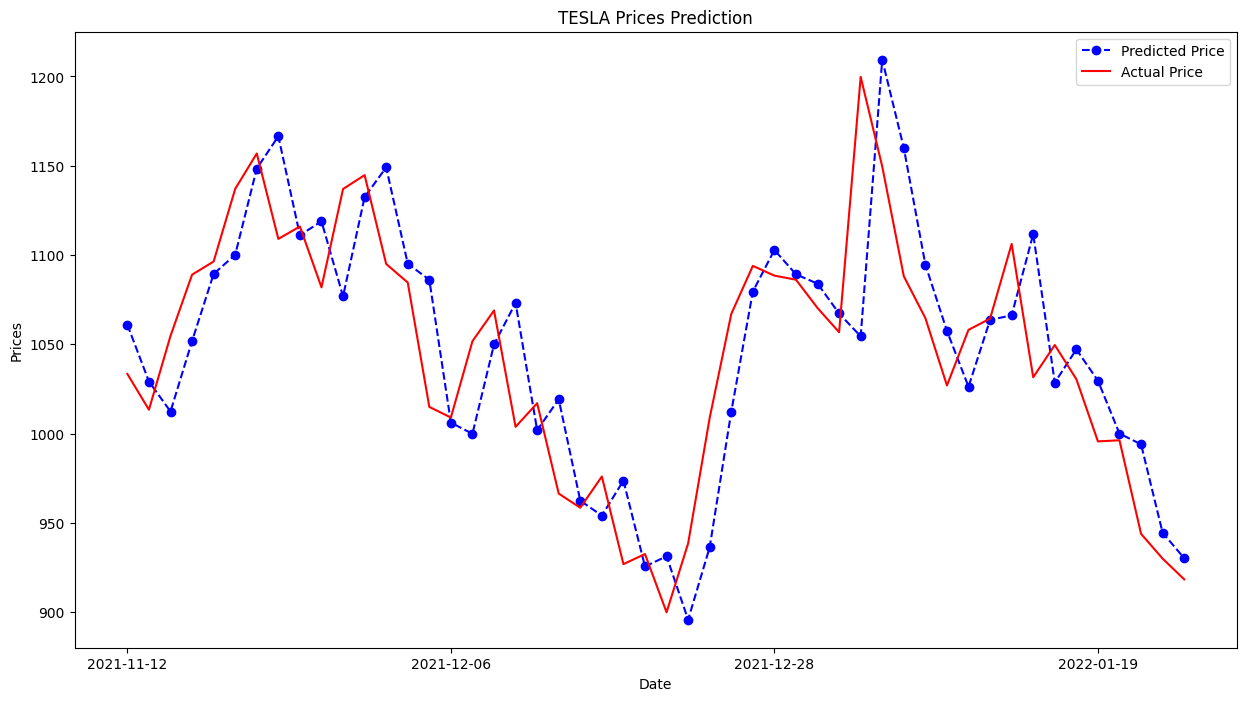

In [17]:
#The MSE of the test set is quite large
# denoting that the precise prediction is a hard problem.
# However, this is the average squared value across all the test set predictions.
# Let’s visualize the predictions to understand the performance of the model more.


test_set_range = df[int(len(df)*0.5):].index
plt.figure(figsize = (15,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, data_test, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(50,100,15), df.Date[50:100:15])
plt.legend()
plt.show()